# Regularized data programming: Low data regime experiments

TubeSpam dataset.

## Preamble

In [1]:
# Importations.
import torch
import numpy as np
import sys
import seaborn as sns
import matplotlib
import pandas as pd
import sklearn

# Personal scripts.
from ratner_mle import RatnerMLE
from bayesian_dp import BayesianDP
from utils import Utils
from train_test import Trainer

# View versioning.
print("python version:", sys.version)
print("\ntorch version:", torch.__version__)
print("numpy version:", np.__version__)
print("seaborn version:", sns.__version__)
print("matplotlib version:", matplotlib.__version__)
print("pandas version:", pd.__version__)
print("sklearn version:", sklearn.__version__)

python version: 3.8.8 (default, Apr 13 2021, 12:59:45) 
[Clang 10.0.0 ]

torch version: 1.7.1
numpy version: 1.22.3
seaborn version: 0.11.1
matplotlib version: 3.3.4
pandas version: 1.2.4
sklearn version: 0.24.1


## Read data

In [2]:
# Read in labeling function matrix files.
df_train = pd.read_csv("../data/TubeSpam/TubeSpam_tuned_lf_matrix_train.csv")
df_val = pd.read_csv("../data/TubeSpam/TubeSpam_tuned_lf_matrix_val.csv")
df_test = pd.read_csv("../data/TubeSpam/TubeSpam_tuned_lf_matrix_test.csv")

# Explore.
print("\n---------------------------")
print("TRAINING DATA:")
print("---------------------------\n")
print(df_train.info())
display(df_train)

print("---------------------------")
print("VALIDATION DATA:")
print("---------------------------\n")
print(df_val.info())
display(df_val)

print("---------------------------")
print("TEST DATA:")
print("---------------------------\n")
print(df_test.info())
display(df_test)


---------------------------
TRAINING DATA:
---------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407 entries, 0 to 1406
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   0        1407 non-null   int64
 1   1        1407 non-null   int64
 2   2        1407 non-null   int64
 3   3        1407 non-null   int64
 4   4        1407 non-null   int64
 5   5        1407 non-null   int64
 6   6        1407 non-null   int64
 7   7        1407 non-null   int64
 8   8        1407 non-null   int64
 9   9        1407 non-null   int64
 10  Label    1407 non-null   int64
 11  Snorkel  1407 non-null   int64
dtypes: int64(12)
memory usage: 132.0 KB
None


,0,1,2,3,4,5,6,7,8,9,Label,Snorkel
0,0,0,0,0,0,0,0,0,0,0,-1,0
1,0,1,0,0,0,0,-1,0,0,-1,1,-1
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,-1,0,-1,0,0,0,-1,-1
4,0,0,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1402,0,0,0,0,0,0,-1,0,0,0,-1,-1
1403,1,0,0,0,0,1,0,0,0,0,1,1
1404,0,0,0,0,0,1,0,0,0,0,1,1
1405,0,0,0,0,0,1,0,0,0,-1,1,1


---------------------------
VALIDATION DATA:
---------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   0        157 non-null    int64
 1   1        157 non-null    int64
 2   2        157 non-null    int64
 3   3        157 non-null    int64
 4   4        157 non-null    int64
 5   5        157 non-null    int64
 6   6        157 non-null    int64
 7   7        157 non-null    int64
 8   8        157 non-null    int64
 9   9        157 non-null    int64
 10  Label    157 non-null    int64
 11  Snorkel  157 non-null    int64
dtypes: int64(12)
memory usage: 14.8 KB
None


,0,1,2,3,4,5,6,7,8,9,Label,Snorkel
0,0,0,0,0,-1,0,-1,0,0,0,-1,-1
1,1,0,0,0,0,1,0,0,0,-1,1,1
2,0,0,0,0,-1,0,0,0,0,-1,-1,-1
3,0,0,0,0,0,1,0,0,0,0,1,1
4,0,0,0,0,-1,0,0,0,0,0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
152,1,1,0,1,-1,1,0,0,0,-1,1,1
153,0,0,0,0,-1,0,0,0,0,0,-1,-1
154,0,0,0,0,0,1,0,0,0,0,1,1
155,0,0,0,0,0,1,0,0,0,0,1,1


---------------------------
TEST DATA:
---------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   0        392 non-null    int64
 1   1        392 non-null    int64
 2   2        392 non-null    int64
 3   3        392 non-null    int64
 4   4        392 non-null    int64
 5   5        392 non-null    int64
 6   6        392 non-null    int64
 7   7        392 non-null    int64
 8   8        392 non-null    int64
 9   9        392 non-null    int64
 10  Label    392 non-null    int64
 11  Snorkel  392 non-null    int64
dtypes: int64(12)
memory usage: 36.9 KB
None


,0,1,2,3,4,5,6,7,8,9,Label,Snorkel
0,0,0,0,0,0,0,0,0,0,0,-1,0
1,0,0,0,0,-1,0,0,0,0,0,-1,-1
2,0,0,0,0,-1,0,0,0,0,-1,-1,-1
3,0,0,0,0,0,0,-1,-1,0,0,-1,-1
4,1,0,0,0,0,1,0,0,0,-1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
387,0,0,0,0,0,0,0,0,0,0,-1,0
388,0,0,0,0,0,0,-1,0,0,0,-1,-1
389,1,0,1,0,0,0,0,0,0,-1,1,1
390,0,0,0,0,0,0,-1,0,0,-1,-1,-1


In [3]:
# Read in raw text data.
df_train_raw = pd.read_csv("../data/TubeSpam/TubeSpam_tuned_train.csv")
df_val_raw = pd.read_csv("../data/TubeSpam/TubeSpam_tuned_val.csv")
df_test_raw = pd.read_csv("../data/TubeSpam/TubeSpam_tuned_test.csv")

# Explore_raw.
print("\n---------------------------")
print("TRAINING DATA:\n")
print("---------------------------\n")
print(df_train_raw.info())
display(df_train_raw)

print("\n---------------------------")
print("VALIDATION DATA:\n")
print("---------------------------\n")
print(df_val_raw.info())
display(df_val_raw)

print("\n---------------------------")
print("TEST DATA:\n")
print("---------------------------\n")
print(df_test_raw.info())
display(df_test_raw)


---------------------------
TRAINING DATA:

---------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407 entries, 0 to 1406
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      1407 non-null   object
 1   author  1407 non-null   object
 2   date    1229 non-null   object
 3   text    1407 non-null   object
 4   label   1407 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 55.1+ KB
None


,ID,author,date,text,label
0,z12afdtaypuat3t5s04ccv4g4xe1elvbcdw,Lindsay Wofford,2014-11-07T13:12:45,What is he saying?!?!?!?!?!?!?!?$? ﻿,0
1,z130drwgasjgevh0n234ht3gfrmugfguz,Guren - MKII,2014-10-01T19:53:07.387000,everyday i&#39;m subscribe﻿,1
2,z13fwnbh5qusx1olr23bcfgjbxiljjv4u04,Flynn Rider,2014-08-20T19:04:01,Watch Maroon 5's latest 2nd single from V (It ...,1
3,z12qzzbpbzn4c5zwu04cir5gmzfozhy4cjk,lebanonwarior1,2014-11-06T18:07:21,Song name??﻿,0
4,z12cvbyjjmuwvxivx223tpujulrwwdt5j04,ampai gmuer,2015-01-27T13:23:56.061000,Check out this playlist on YouTube:👿👳👳👳👳👳﻿,1
...,...,...,...,...,...
1402,z13thxlwoy2qftuh204cgvvg3yvpyfbgvvc0k,Brandon Richards,2015-05-27T10:35:17.730000,LMFAO!﻿,0
1403,_2viQ_Qnc69MEEHHJxZ427KX8MlljJPnUC2YBbvbWwY,ThirdDegr3e,2013-07-13T20:48:06.033000,**CHECK OUT MY NEW MIXTAPE**** **CHECK OUT MY ...,1
1404,z12rvtogemvtv3xnq23zc3erxsfui52ht04,jessie J,2015-01-08T16:16:52.163000,Check out this video on YouTube:Qq﻿,1
1405,LneaDw26bFsC5JIEICo3_lSrLloArwbectyGhPF4YeA,TheGenieBoy,NaN,check out fantasy music right here -------&...,1



---------------------------
VALIDATION DATA:

---------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      157 non-null    object
 1   author  157 non-null    object
 2   date    138 non-null    object
 3   text    157 non-null    object
 4   label   157 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 6.3+ KB
None


,ID,author,date,text,label
0,z13fehihaneyzh3wp04cfxrwkyfkwvgoex00k,pratik patel,2015-05-23T05:28:49.504000,"mindblowing dance.,.,.superbbb song﻿",0
1,LneaDw26bFt7AvG8x15igOZvrWApak5Zh5-PPag9YTs,themagicmangotree,NaN,Check out my channel for funny skits! Thanks!,1
2,z13vc32olxm2znkjz04cd35gnozjebqhlig,TheLegitBroz,2014-11-08T00:26:35,The Funny Thing Is That this song was made in ...,0
3,z13ohniidsqhcjs1k22ti544qybadb25b04,reesekupp24,2015-05-14T14:10:58.987000,Check out this video on YouTube:﻿,1
4,z124inzqgoyeh33uw23iibficv2kuf2nx,anthony Jennings,2014-11-07T23:26:04,"People Who Say That ""This Song Is Too Old Now,...",0
...,...,...,...,...,...
152,LneaDw26bFshakV1mr8xdnPsZTs4kKWkL20CH_8-gww,George Raps,NaN,••••►►My name is George and let me tell u EMIN...,1
153,z12mw1oyume1vb3by04ci3u5it3pgbbgrng0k,King Kunta,2015-05-27T09:59:32.192000,Feels and emotions in this song...God damn﻿,0
154,z12ntfuinv2kjvjtr220szfjmru0ydt13,Jessica Benavides,2015-05-26T04:15:04.528000,Check out this video on YouTube:<br />﻿,1
155,z13fzxyw3q3bupy0w22oc3wrmu2qdtmu4,Lucas Bonini,2015-05-20T17:15:30.741000,Gusttavo Lima Você não me conhece <br />Check ...,1



---------------------------
TEST DATA:

---------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      392 non-null    object
 1   author  392 non-null    object
 2   date    344 non-null    object
 3   text    392 non-null    object
 4   label   392 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 15.4+ KB
None


,ID,author,date,text,label
0,z13mxjrbuyv5slha204cjdwg0wauylyap3w,Peter Wilkes,2014-09-15T15:48:57,"really want this video to get 1 billion views,...",0
1,z120uhiw0ubhcnxvi23uw5oorpuncvso204,tombraiderxXx12,2014-09-07T18:38:10,I'm not a big fan of the song but this video i...,0
2,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0
3,z13wtr2yssezhdaqa04cjvbody3qwjhpwk00k,Kirill Nazarethian,2014-11-07T22:59:37,2:05. Hahahahah ﻿,0
4,z12wuz2qqnawe50js04cejpzosrzdr0r1k40k,Dana Matich,2014-11-08T03:32:55,Hey guys! Check this out: Kollektivet - Don't ...,1
...,...,...,...,...,...
387,z13lgrngavanillud22bxz05tpe0endag04,pooperscooper71,2015-05-24T13:13:23.397000,I wish that guy wasn&#39;t so protective geeze﻿,0
388,z12ghl3g3lfvsz5lh223u10jnyvgflune,Madagascar Tropic Voyage,2015-05-26T16:02:07.100000,Nice﻿,0
389,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1
390,z130zp15xof5db0x204cfv55awj1wl3aipc0k,Gianpaolo T,2014-11-07T15:58:09,Wow 23 min ago﻿,0


## Process data

In [4]:
# Spam dataset: Disaggregate labeling function outputs and gold labels.
# Drop third and final LF.
L_train = np.array(df_train.drop(columns = ["Label", "Snorkel"]))
y_train = np.array(df_train["Label"])

L_val = np.array(df_val.drop(columns = ["Label", "Snorkel"]))
y_val = np.array(df_val["Label"])

L_test = np.array(df_test.drop(columns = ["Label", "Snorkel"]))
y_test = np.array(df_test["Label"])

print("\n***L_train.shape =", L_train.shape)
display(L_train)
print("\n***L_val.shape =", L_val.shape)
display(L_val)
print("\n***L_test.shape =", L_test.shape)
display(L_test)

display(y_train)
display(y_val)
display(y_test)


***L_train.shape = (1407, 10)


array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  1,  0, ...,  0,  0, -1],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0, -1],
       [ 0,  0,  0, ...,  0,  0,  0]])


***L_val.shape = (157, 10)


array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0, -1],
       [ 0,  0,  0, ...,  0,  0, -1],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0, -1]])


***L_test.shape = (392, 10)


array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0, -1],
       ...,
       [ 1,  0,  1, ...,  0,  0, -1],
       [ 0,  0,  0, ...,  0,  0, -1],
       [ 1,  1,  0, ...,  0,  0,  0]])

array([-1,  1,  1, ...,  1,  1, -1])

array([-1,  1, -1,  1, -1, -1,  1,  1, -1,  1, -1, -1,  1, -1, -1, -1,  1,
       -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1,  1, -1, -1,
        1,  1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  1, -1, -1,
        1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1,
        1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1,
       -1, -1, -1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1,
        1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1,  1, -1,  1,
        1,  1, -1,  1, -1, -1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1,  1,
        1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1, -1])

array([-1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1, -1,  1, -1,
        1,  1,  1, -1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1, -1, -1,  1,
       -1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1, -1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1, -1,
       -1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,
       -1,  1,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1, -1,  1,  1,
       -1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1, -1,
        1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,
        1,  1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1,  1, -1,  1,  1,
        1,  1,  1, -1, -1, -1, -1,  1, -1,  1,  1, -1,  1, -1, -1, -1, -1,
       -1,  1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,
        1,  1,  1,  1, -1

## Training config

Hyperparameter values were selected through grid search on the validation set.

In [26]:
# Total labeling functions.
M = L_train.shape[1]

# Compute empirical betas for training data.
empirical_coverage = []
for i in range(L_train.shape[1]):
    coverage = np.count_nonzero(L_train[:, i]) / L_train.shape[0]
    empirical_coverage.append(coverage)
print("Empirical coverages =\n", empirical_coverage)

# Macros for present experiments.
EPOCHS = 175
LR_MAP = 0.01
LR_MLE = 0.001
TIE_POLICY = "abstain"
INIT_ALPHA_MAP = [1.0] * M
INIT_ALPHA_MLE = [0.9] * M
INIT_BETA = empirical_coverage
STRENGTH = 10
CLIP_GRADS = 10
OPTIMIZER = torch.optim.SGD
FORCE_ABSTAIN = True

Empirical coverages =
 [0.19047619047619047, 0.11727078891257996, 0.1044776119402985, 0.1044776119402985, 0.15991471215351813, 0.2281449893390192, 0.24946695095948826, 0.1044776119402985, 0.0511727078891258, 0.38521677327647474]


In [6]:
# Instantiate Utils and Trainer objects for utility functions.
utils = Utils()
trainer = Trainer()

In [7]:
print("Total LFs =", M)

Total LFs = 10


## Majority vote scores


---------------------------------------------
tn, fp, fn, tp = [150   1  22 122]
F1             = 0.9138576779026217
Accuracy       = 0.9220338983050848
Precision      = 0.991869918699187
Recall         = 0.8472222222222222
ROC AUC        = 0.9202998528329654
Coverage       = 0.7525510204081632
---------------------------------------------



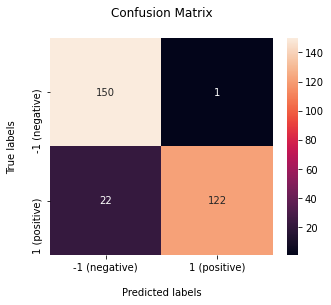

In [8]:
majority_vote = utils.vote_majority(L_test, 
                                    tie_policy = TIE_POLICY)
mv_scores = utils.score(y_test, 
                        majority_vote, 
                        verbose = True, 
                        plot_confusion = True)

## Snorkel scores


---------------------------------------------
tn, fp, fn, tp = [152   5  37 155]
F1             = 0.8806818181818181
Accuracy       = 0.8796561604584527
Precision      = 0.96875
Recall         = 0.8072916666666666
ROC AUC        = 0.8877222664543524
Coverage       = 0.8903061224489796
---------------------------------------------



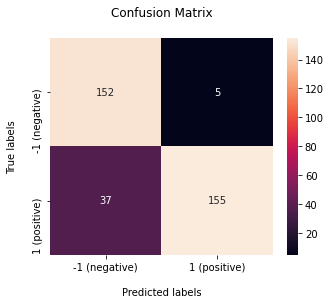

In [9]:
snorkel_scores = utils.score(y_test, 
                             df_test["Snorkel"], 
                             verbose = True, 
                             plot_confusion = True)


---------------------------------------------
tn, fp, fn, tp = [172   0   0 123]
F1             = 1.0
Accuracy       = 1.0
Precision      = 1.0
Recall         = 1.0
ROC AUC        = 1.0
Coverage       = 0.7525510204081632
---------------------------------------------



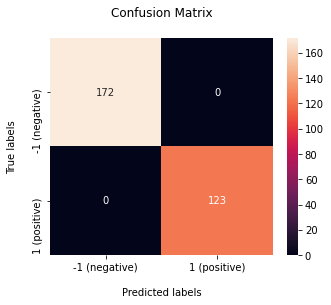

In [10]:
# Compare majority vote and Snorkel.
mv_v_snorkel_scores = utils.score(np.array(df_test["Snorkel"]), 
                                  majority_vote,
                                  verbose = True,
                                  plot_confusion = True)

## Dummy classifier scores

In [11]:
# Identify most abundant class.
df_train.Label.value_counts()

 1    723
-1    684
Name: Label, dtype: int64


---------------------------------------------
tn, fp, fn, tp = [  0 191   0 201]
F1             = 0.6779089376053963
Accuracy       = 0.5127551020408163
Precision      = 0.5127551020408163
Recall         = 1.0
ROC AUC        = 0.5
Coverage       = 1.0
---------------------------------------------



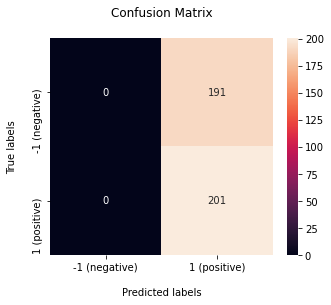

In [12]:
# Dummy classifier: label everything most abundant class.
dummy_scores = utils.score(y_test,
                           np.array([1] * len(y_test)), 
                           verbose = True, 
                           plot_confusion = True)

## Define priors

### Empirical accuracies

In [13]:
# Parameters of best performing model yet.
# Target mean of Beta distribution.

# Known accuracies of each synthetic LF on the training set.
# NOTE: Demote 100% accuracies to 99.9999%, otherwise model cannot learn.
empirical_accuracies = [0.876866, 0.987879, 0.938776, 0.979592, 0.737778, 
                        0.999999, 0.732194, 0.625850, 0.833333, 0.594096]

### Priors from majority vote

In [14]:
# Get priors from majority vote.
priors_mv = utils.get_priors_majority_vote(L_train, remove_zeros = True)
print("\npriors_mv_means =\n", priors_mv)
print("\nempirical accuracies =\n", empirical_accuracies)

l2_mv = np.linalg.norm(np.array(priors_mv) - np.array(empirical_accuracies))
print("\nL2 (priors_mv - empirical_accuracies) =", l2_mv)


# Estimated accuracies via majority vote = [0.9457013574660633, 0.9621212121212122, 0.7659574468085106, 0.9851851851851852, 0.8872549019607843, 0.9597069597069597, 0.9248366013071896, 0.92, 0.9852941176470589, 0.81859410430839]

priors_mv_means =
 [0.9457013574660633, 0.9621212121212122, 0.7659574468085106, 0.9851851851851852, 0.8872549019607843, 0.9597069597069597, 0.9248366013071896, 0.92, 0.9852941176470589, 0.81859410430839]

empirical accuracies =
 [0.876866, 0.987879, 0.938776, 0.979592, 0.737778, 0.999999, 0.732194, 0.62585, 0.833333, 0.594096]

L2 (priors_mv - empirical_accuracies) = 0.5063527163009788


### Manual priors

In [15]:
# Manually design priors.
priors_manual = [0.8] * M
print("\npriors_manual_means =\n", priors_manual)
print("\nempirical accuracies =\n", empirical_accuracies)

l2_mv = np.linalg.norm(np.array(priors_manual) - np.array(empirical_accuracies))
print("\nL2 (priors_manual - empirical_accuracies) =", l2_mv)


priors_manual_means =
 [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]

empirical accuracies =
 [0.876866, 0.987879, 0.938776, 0.979592, 0.737778, 0.999999, 0.732194, 0.62585, 0.833333, 0.594096]

L2 (priors_manual - empirical_accuracies) = 0.4637063346159938


## Explore untrained models

Zero training observations.


Untrained MAP score:

---------------------------------------------
tn, fp, fn, tp = [150   1  22 122]
F1             = 0.9138576779026217
Accuracy       = 0.9220338983050848
Precision      = 0.991869918699187
Recall         = 0.8472222222222222
ROC AUC        = 0.9202998528329654
Coverage       = 0.7525510204081632
---------------------------------------------



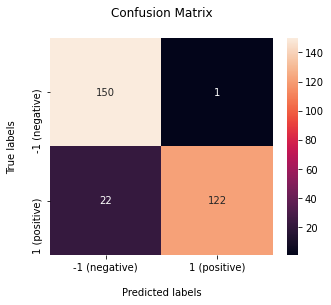

[0.9220338983050848,
 0.9138576779026217,
 0.991869918699187,
 0.8472222222222222,
 0.9202998528329654,
 0.7525510204081632]

In [16]:
MAP = BayesianDP(alpha = INIT_ALPHA_MAP,
                 beta = INIT_BETA,
                 priors_alpha = priors_mv,
                 prior_strength = STRENGTH)
pred_map = MAP.predict(L_test, 
                       return_proba = False, 
                       tie_policy = TIE_POLICY)
print("\nUntrained MAP score:")
utils.score(y_test, pred_map)

In [17]:
print("PRIOR PARAMS:")
for prior in MAP.priors_alpha:
    print(prior.concentration1, ",", prior.concentration0)

PRIOR PARAMS:
tensor(1000.) , tensor(57.4163)
tensor(1000.) , tensor(39.3701)
tensor(1000.) , tensor(305.5555)
tensor(1000.) , tensor(15.0376)
tensor(1000.) , tensor(127.0718)
tensor(1000.) , tensor(41.9847)
tensor(1000.) , tensor(81.2721)
tensor(1000.) , tensor(86.9565)
tensor(1000.) , tensor(14.9254)
tensor(1000.) , tensor(221.6066)



Untrained MLE score:

---------------------------------------------
tn, fp, fn, tp = [150   4  30 141]
F1             = 0.8924050632911392
Accuracy       = 0.8953846153846153
Precision      = 0.9724137931034482
Recall         = 0.8245614035087719
ROC AUC        = 0.8992936887673729
Coverage       = 0.8290816326530612
---------------------------------------------



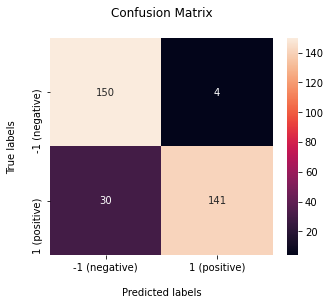

[0.8953846153846153,
 0.8924050632911392,
 0.9724137931034482,
 0.8245614035087719,
 0.8992936887673729,
 0.8290816326530612]

In [18]:
MLE = RatnerMLE(alpha = INIT_ALPHA_MLE,
                 beta = INIT_BETA)
pred_mle = MLE.predict(L_test, 
                       return_proba = False, 
                       tie_policy = TIE_POLICY)
print("\nUntrained MLE score:")
utils.score(y_test, pred_mle)

## Explore variance under low data

In [19]:
# Loop through different subset sizes.
# Scores = [acc, f1, precision, recall, roc, coverage].
sizes = [1, 5, 10, 50, 100, 500, 1000, L_train.shape[0]]
n_iter = 5
epochs_map = 175
epochs_mle_pre = 50
epochs_mle_post = 100
indices_by_size = dict()
for size in sizes:

    if size < 500:
        epochs_mle = epochs_mle_pre
    else:
        epochs_mle = epochs_mle_post
    if size < 50:
        p_y = 0.9
    else:
        p_y = 0.5
    if size == L_train.shape[0]:
        epochs_mle = EPOCHS
        n_iter = 1
    
    map_scores, mle_scores, majority_scores, subset_indices = trainer.loop_train_random_subset(L_train,
                                                                                               L_val,
                                                                                               y_val,
                                                                                               L_test, 
                                                                                               y_test,
                                                                                               INIT_ALPHA_MAP,
                                                                                               INIT_ALPHA_MLE,
                                                                                               INIT_BETA,
                                                                                               prior_strength = STRENGTH,
                                                                                               p_y = p_y,
                                                                                               force_abstain = FORCE_ABSTAIN,
                                                                                               epochs_map = epochs_map,
                                                                                               epochs_mle = epochs_mle,
                                                                                               learning_rate_map = LR_MAP,
                                                                                               learning_rate_mle = LR_MLE,
                                                                                               early_stopping = True,
                                                                                               patience = 5,
                                                                                               clip_grads = CLIP_GRADS,
                                                                                               verbose = False,
                                                                                               n_rows = size, 
                                                                                               n_iter = n_iter)
    # Store indices to rerun experiment if needed.
    indices_by_size[size] = subset_indices
    
    # Run supervised learning model.
    svm_scores = []
    for i in range(n_iter):
        y_train_svm = df_train_raw.iloc[list(subset_indices.get(i))]["label"]
        # Can only compute if both labels present in training set.
        if np.unique(y_train_svm).shape[0] > 1:
            X_train_svm = df_train_raw.iloc[list(subset_indices.get(i))]["text"]
            y_train_svm = np.array(y_train_svm, dtype = int)
            X_test_svm = df_test_raw["text"]
            y_test_svm = np.array(df_test_raw["label"], dtype = int)
            scores = trainer.train_test_score_svm(X_train_svm, 
                                                  X_test_svm, 
                                                  y_train_svm, 
                                                  y_test_svm,
                                                  alpha = 1e-3) # Optimized alpha.
            svm_scores.append(scores)
        else:
            svm_scores.append([0.0] * len(map_scores[0]))
    
    print("\n# -----------------------------------")
    print("# ---- SUBSET SIZE =", size)
    print("# -----------------------------------")
    print("\n# ---- MAP ----") 
    print("\n# [accuracy, f1, precision, recall, roc, coverage]")
    trainer.compute_variance(map_scores, "MAP", size)
    print("\n# ---- MLE ----")
    print("\n# [accuracy, f1, precision, recall, roc, coverage]")
    trainer.compute_variance(mle_scores, "MLE", size)
    print("\n#---- MAJORITY ----")
    print("\n# [accuracy, f1, precision, recall, roc, coverage]")
    trainer.compute_variance(majority_scores, "MAJ", size)
    print("\n#---- SUPPORT VECTOR MACHINE ----")
    print("\n# [accuracy, f1, precision, recall, roc, coverage]")
    trainer.compute_variance(svm_scores, "SVM", size)


# Estimated accuracies via majority vote = [0.9, 0.9, 0.9, 0.9, 0.999999, 0.9, 0.999999, 0.9, 0.9, 0.999999]

# Estimated accuracies via majority vote = [0.9, 0.9, 0.9, 0.9, 0.999999, 0.9, 0.9, 0.9, 0.9, 0.999999]

# Estimated accuracies via majority vote = [0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.999999, 0.9]

# Estimated accuracies via majority vote = [0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.999999, 0.9, 0.999999]

# Estimated accuracies via majority vote = [0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9]

--- EARLY STOPPING AT EPOCH 42 OF 175 ---


# -----------------------------------
# ---- SUBSET SIZE = 1
# -----------------------------------

# ---- MAP ----

# [accuracy, f1, precision, recall, roc, coverage]

# Scores = [accuracy, f1, precision, recall, auc roc, coverage]

df_MAP_1 <- data.frame(Model = 'MAP', Subset = 1, Metric = c('Accuracy', 'F1', 'Precision', 'Recall', 'AUC ROC', 'Coverage'),
     Variance = c(
0.0009514507325481178, 0.001589006376963862, 5.07105780978836

### View indices for subsetting

In [23]:
indices_by_size

{1: {0: array([1309]),
  1: array([950]),
  2: array([941]),
  3: array([1060]),
  4: array([996])},
 5: {0: array([ 133, 1025, 1197, 1347,  696]),
  1: array([ 618, 1295,  213,  730,  399]),
  2: array([1051,  174,  664, 1092, 1116]),
  3: array([  12, 1108, 1007,  583,  870]),
  4: array([ 289,  208,  191,  392, 1010])},
 10: {0: array([1385,  118,   27,   86,  911,  894,   95, 1022,  440, 1330]),
  1: array([ 967,  534, 1246, 1270,  380,  963,  751,  710,  875,  854]),
  2: array([ 858, 1251, 1241,  628,  542, 1319,  302, 1214,  872,  536]),
  3: array([1305,  570,  355, 1035, 1089, 1386, 1127,  455, 1301,  523]),
  4: array([1006, 1361, 1179,  646,  294,   65,  255,  511,  706,  344])},
 50: {0: array([1126,  228, 1091,  441, 1295, 1024, 1301,  551,  742,  591,  718,
         1073, 1330,  251,   89,  727,  416, 1236,  565,  801,  403,  960,
         1132,  332,  853,  936, 1291,  197, 1157, 1089,  954,  250,  382,
           69, 1375, 1320,  352,  295, 1018,  854,  478,  590,  961,

## End of document


---------------------------------------------
tn, fp, fn, tp = [150   1  19 125]
F1             = 0.9259259259259259
Accuracy       = 0.9322033898305084
Precision      = 0.9920634920634921
Recall         = 0.8680555555555556
ROC AUC        = 0.9307165194996321
Coverage       = 0.7525510204081632
---------------------------------------------



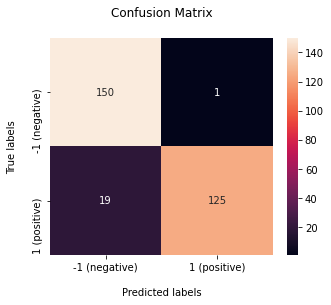

[0.9322033898305084,
 0.9259259259259259,
 0.9920634920634921,
 0.8680555555555556,
 0.9307165194996321,
 0.7525510204081632]

In [27]:
MAP = BayesianDP(alpha = INIT_ALPHA_MAP,
                 beta = INIT_BETA,
                 priors_alpha = priors_mv,
                 prior_strength = STRENGTH)
scores = MAP.fit(L_train, 
                 L_val = L_val,
                 y_val = y_val,
                 optimizer = OPTIMIZER,
                 learning_rate = LR_MAP,
                 tie_policy = TIE_POLICY,
                 epochs = 250, 
                 early_stopping = True,
                 patience = 5,
                 clip_grads = CLIP_GRADS,
                 verbose = False)
pred_map = MAP.predict(L_test, 
                       return_proba = False, 
                       tie_policy = TIE_POLICY)
utils.score(y_test, pred_map)


---------------------------------------------
tn, fp, fn, tp = [169   3   0 123]
F1             = 0.9879518072289156
Accuracy       = 0.9898305084745763
Precision      = 0.9761904761904762
Recall         = 1.0
ROC AUC        = 0.9912790697674418
Coverage       = 0.7525510204081632
---------------------------------------------



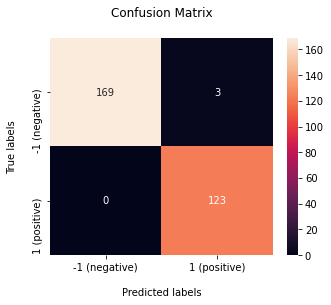

[0.9898305084745763,
 0.9879518072289156,
 0.9761904761904762,
 1.0,
 0.9912790697674418,
 0.7525510204081632]

In [28]:
utils.score(majority_vote, pred_map)


---------------------------------------------
tn, fp, fn, tp = [150   1  19 125]
F1             = 0.9259259259259259
Accuracy       = 0.9322033898305084
Precision      = 0.9920634920634921
Recall         = 0.8680555555555556
ROC AUC        = 0.9307165194996321
Coverage       = 0.7525510204081632
---------------------------------------------



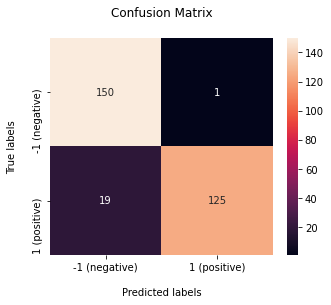

[0.9322033898305084,
 0.9259259259259259,
 0.9920634920634921,
 0.8680555555555556,
 0.9307165194996321,
 0.7525510204081632]

In [37]:
pred_p_y = MAP.predict(L_test, 
                       p_y = 0.5,
                       return_proba = False, 
                       tie_policy = TIE_POLICY)
utils.score(y_test, pred_p_y)